In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
plt.rc('font', family='Malgun Gothic')

In [59]:
# 모두의주차장 데이터 가져오기
df_raw = pd.read_csv("./실전db.csv")

In [60]:
# 막대 그래프 넓이 조절
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

In [61]:
df_raw.head()

,USER_ID,JOIN_DATE,D_TYPE,STORE_ID,GOODS_TYPE,DATE,COUNT,AD1
0,2858,2014-01-07,AA,1892,A,2020-01-01,1,GN
1,5647,2014-02-14,BB,182009,A,2020-01-01,1,J
2,33314,2014-11-20,BB,82431,A,2020-01-01,1,SC
3,37001,2014-12-04,BB,725,C,2020-01-01,1,MP
4,37819,2014-12-07,AA,220691,C,2020-01-01,1,JRR


In [62]:
# USER_ID와 STORE_ID int형을 object형으로 변환
df_raw[['USER_ID','STORE_ID']] = df_raw[['USER_ID','STORE_ID']].astype(str)

In [63]:
# USER_ID 개수 확인
print("1. USER_ID 개수 :" + str(len(df_raw['USER_ID'].unique())))
# D_TYPE 개수 확인
print("2. D_TYPE 개수 :" + str(len(df_raw['D_TYPE'].unique())))
print(df_raw['D_TYPE'].unique())                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
# STORE_ID 개수 확인
print("3. STORE_ID 개수 :" + str(len(df_raw['STORE_ID'].unique())))
# GOODS_TYPE 개수 확인
print("4. GOODS_TYPE 개수 :" + str(len(df_raw['GOODS_TYPE'].unique())))
print(df_raw['GOODS_TYPE'].unique())
# AD1 개수 확인
print("5. AD1 개수 :" + str(len(df_raw['AD1'].unique())))

1. USER_ID 개수 :165425
2. D_TYPE 개수 :3
['AA' 'BB' 'CC']
3. STORE_ID 개수 :1061
4. GOODS_TYPE 개수 :4
['A' 'C' 'B' 'D']
5. AD1 개수 :85


In [64]:
# DATE(결제일)을 년도와 월 나눠서 새 변수 생성
df_raw['DATE'] = pd.to_datetime(df_raw['DATE'])
df_raw['MONTH'] = df_raw['DATE'].dt.strftime('%m') # 월
df_raw['YEAR'] = df_raw['DATE'].dt.strftime('%Y')  # 년도
df_raw['WeekDay'] = df_raw['DATE'].dt.weekday # 0(월) ~ 6(일) 요일
df_raw

,USER_ID,JOIN_DATE,D_TYPE,STORE_ID,GOODS_TYPE,DATE,COUNT,AD1,MONTH,YEAR,WeekDay
0,2858,2014-01-07,AA,1892,A,2020-01-01,1,GN,01,2020,2
1,5647,2014-02-14,BB,182009,A,2020-01-01,1,J,01,2020,2
2,33314,2014-11-20,BB,82431,A,2020-01-01,1,SC,01,2020,2
3,37001,2014-12-04,BB,725,C,2020-01-01,1,MP,01,2020,2
4,37819,2014-12-07,AA,220691,C,2020-01-01,1,JRR,01,2020,2
...,...,...,...,...,...,...,...,...,...,...,...
879266,1830551,2020-12-31,BB,219886,B,2020-12-31,1,GN,12,2020,3
879267,1830570,2020-12-31,BB,82433,B,2020-12-31,1,CY,12,2020,3
879268,1830580,2020-12-31,AA,92020,B,2020-12-31,1,JRR,12,2020,3
879269,1830589,2020-12-31,BB,92437,B,2020-12-31,1,J,12,2020,3


## GOODS_TYPE

In [65]:
df_Goods_A = df_raw[df_raw['GOODS_TYPE']=='A']
print('GOODS_TYPE "A" 데이터 수 : '+ str(len(df_Goods_A)))
df_Goods_B = df_raw[df_raw['GOODS_TYPE']=='B']
print('GOODS_TYPE "B" 데이터 수 : '+ str(len(df_Goods_B)))
df_Goods_C = df_raw[df_raw['GOODS_TYPE']=='C']
print('GOODS_TYPE "C" 데이터 수 : '+ str(len(df_Goods_C)))
df_Goods_D = df_raw[df_raw['GOODS_TYPE']=='D']
print('GOODS_TYPE "D" 데이터 수 : '+ str(len(df_Goods_D)))

GOODS_TYPE "A" 데이터 수 : 609790
GOODS_TYPE "B" 데이터 수 : 118541
GOODS_TYPE "C" 데이터 수 : 131163
GOODS_TYPE "D" 데이터 수 : 19777


C:\Users\Jiseon\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


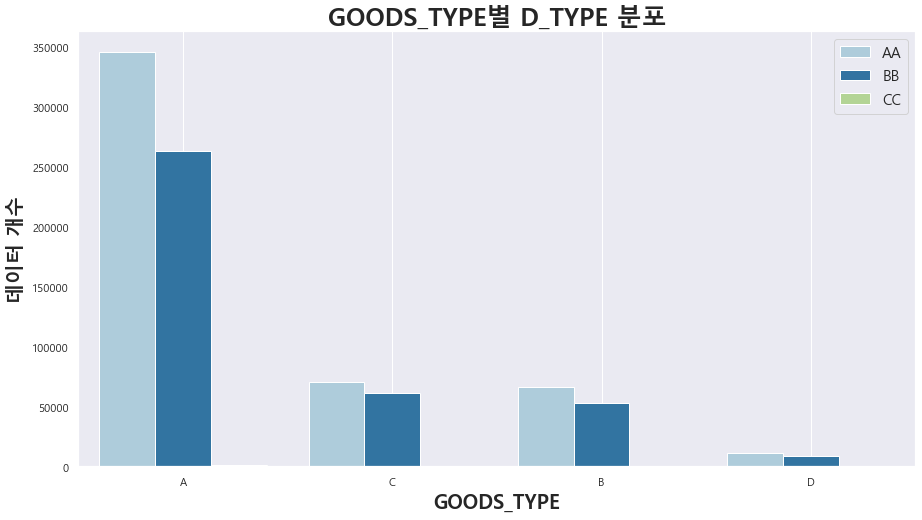

In [67]:
fig, ax = plt.subplots(1,1, figsize = (15, 8))
sns.set_palette("Paired", 9)
sns.countplot(x  = 'GOODS_TYPE', hue = 'D_TYPE', data = df_raw)
plt.grid()
plt.title('GOODS_TYPE별 D_TYPE 분포', fontsize=25, fontweight = 'bold')
plt.ylabel('데이터 개수', fontsize=20, fontweight = 'bold')
plt.xlabel('GOODS_TYPE', fontsize=20, fontweight = 'bold')

plt.legend(prop={'size': 15})
fig.show()

In [68]:
point=[]
G_list = ['A','B','C','D']
for a in G_list:
    point.append(df_raw['D_TYPE'][df_raw['GOODS_TYPE']==a].value_counts())
print(point)

[AA    345779
BB    262876
CC      1135
Name: D_TYPE, dtype: int64, AA    65966
BB    52435
CC      140
Name: D_TYPE, dtype: int64, AA    70010
BB    60903
CC      250
Name: D_TYPE, dtype: int64, AA    11411
BB     8327
CC       39
Name: D_TYPE, dtype: int64]


AA    345779
BB    262876
CC      1135
Name: D_TYPE, dtype: int64


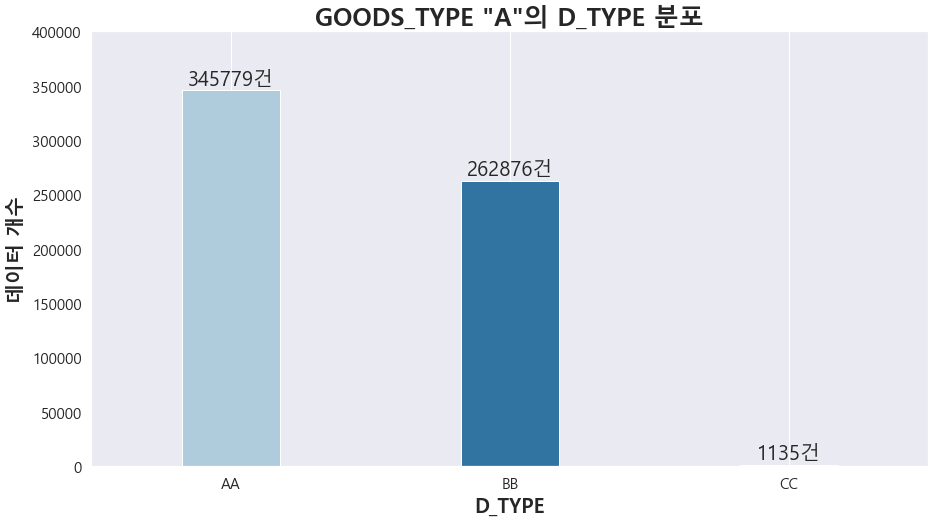

In [69]:
# GOODS_TYPE A의 D_TYPE 데이터 분포

#plt.figure(figsize=(25,12))
fig, ax = plt.subplots(1,1, figsize = (15,8))
sns.set_palette("Paired", 9)
sns.countplot(x=df_Goods_A['D_TYPE'], data=df_Goods_A,ax =ax)
change_width(ax, .35)
plt.grid()
plt.title('GOODS_TYPE "A"의 D_TYPE 분포', fontsize=25, fontweight = 'bold')
plt.ylabel('데이터 개수', fontsize=20, fontweight = 'bold')
plt.xlabel('D_TYPE', fontsize=20, fontweight = 'bold')
plt.tick_params(axis = "x", labelsize = 15)
plt.tick_params(axis = 'y', labelsize = 15)
plt.tick_params(axis = "x", labelsize = 15)
plt.tick_params(axis = 'y', labelsize = 15)
#plt.xticks([0,1],['',''])
plt.ylim(0,400000)

point = df_Goods_A['D_TYPE'].value_counts()
print(point)
for i in range(point.shape[0]):
    ax.text(x = i, y = point[i] + 5000, s = f"{point[i]}건", fontdict = {'size' : 20}, horizontalalignment = 'center')
plt.show()

위 그래프는 GOODS_TYPE A의 D_TYPE 그래프만 그려본 것

WeekDay2 정의  
- 월-금 : 평일  
- 금-토 : 주말

In [70]:
# 평일/ 주말 데이터값 포함하는 WeekDay2 변수 생성
df_raw['WeekDay2'] = 0

In [71]:
df_raw.loc[(df_raw['WeekDay'] == 0), 'WeekDay2'] = '평일'
df_raw.loc[(df_raw['WeekDay'] == 1), 'WeekDay2'] = '평일'
df_raw.loc[(df_raw['WeekDay'] == 2), 'WeekDay2'] = '평일'
df_raw.loc[(df_raw['WeekDay'] == 3), 'WeekDay2'] = '평일'
df_raw.loc[(df_raw['WeekDay'] == 4), 'WeekDay2'] = '평일'
df_raw.loc[(df_raw['WeekDay'] == 5), 'WeekDay2'] = '주말'
df_raw.loc[(df_raw['WeekDay'] == 6), 'WeekDay2'] = '주말'

## 가설1.
### 만약, D_TYPE이 AA 당일권, BB 평일권, CC 주말권이라면 주말에 CC의 건수가 많지 않을까?

In [73]:
df_W_D_C = df_raw.groupby(['WeekDay2','D_TYPE'])['COUNT'].sum()
df_W_D_C_df = df_W_D_C.reset_index()

In [74]:
df_W_D_C_a = df_raw.groupby('WeekDay2')['COUNT'].sum()

In [75]:
df_W_D_C_t = df_W_D_C / df_W_D_C_a
df_W_D_C_t = df_W_D_C_t.to_frame().reset_index()
df_W_D_C_t.columns = ['WeekDay2','D_TYPE','COUNT(비율)']

In [76]:
df_W_D_C_t

,WeekDay2,D_TYPE,COUNT(비율)
0,주말,AA,0.556405
1,주말,BB,0.431737
2,주말,CC,0.011858
3,평일,AA,0.557168
4,평일,BB,0.433278
5,평일,CC,0.009554


C:\Users\Jiseon\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


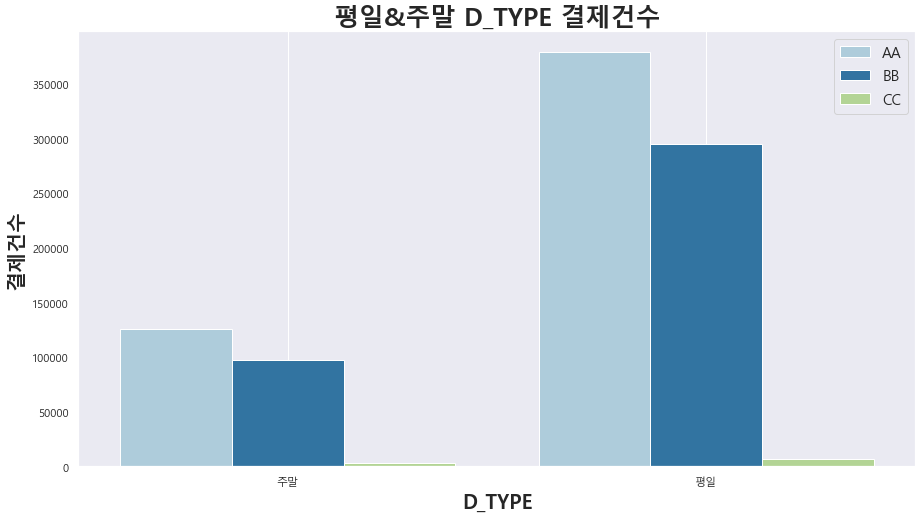

In [78]:
fig, ax = plt.subplots(1,1, figsize = (15, 8))
sns.set_palette("Paired", 9)
sns.barplot(x  = 'WeekDay2', y='COUNT', hue = 'D_TYPE', data = df_W_D_C_df)
plt.grid()
plt.title('평일&주말 D_TYPE 결제건수', fontsize=25, fontweight = 'bold')
plt.ylabel('결제건수', fontsize=20, fontweight = 'bold')
plt.xlabel('D_TYPE', fontsize=20, fontweight = 'bold')

plt.legend(prop={'size': 15})

fig.show()

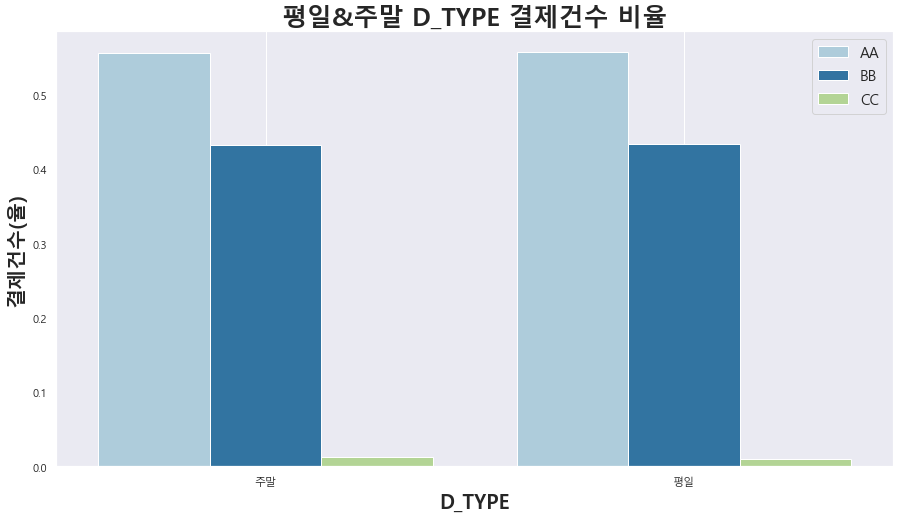

In [79]:
fig, ax = plt.subplots(1,1, figsize = (15, 8))
sns.set_palette("Paired", 9)
sns.barplot(x  = 'WeekDay2', y='COUNT(비율)', hue = 'D_TYPE', data = df_W_D_C_t)
plt.grid()
plt.title('평일&주말 D_TYPE 결제건수 비율', fontsize=25, fontweight = 'bold')
plt.ylabel('결제건수(율)', fontsize=20, fontweight = 'bold')
plt.xlabel('D_TYPE', fontsize=20, fontweight = 'bold')

plt.legend(prop={'size': 15})

```
D타입 CC는 도대체 무엇이길래 건수가 이렇게 적을까...   
그래도 비율로 보았을 때, 아주 적은 수치지만 주말에 CC 이용률이 평일보다 조금 높게 나옴   
아니면 AA : 당일 / BB : 주간 / CC : 월간 이려나?   
그런데 만약 D_TYPE이 월간이나 주간으로 나뉘어진 타입이라면 주말과 평일 이용률이 별로 의미없지않나? 평일이나 주말에 미리 월간이든 주간이든 구입할 수 있으니  
```

### 그렇담 일별로 추세를 보자

In [80]:
df_raw.info() # DATE 컬럼 타입 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879271 entries, 0 to 879270
Data columns (total 12 columns):
USER_ID       879271 non-null object
JOIN_DATE     879271 non-null object
D_TYPE        879271 non-null object
STORE_ID      879271 non-null object
GOODS_TYPE    879271 non-null object
DATE          879271 non-null datetime64[ns]
COUNT         879271 non-null int64
AD1           879271 non-null object
MONTH         879271 non-null object
YEAR          879271 non-null object
WeekDay       879271 non-null int64
WeekDay2      879271 non-null object
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 80.5+ MB


In [81]:
# 시계열을 위해 DATE컬럼을 인덱스로 설정
df_raw_date = df_raw.set_index('DATE', drop=True, inplace=False)
df_raw_date.head()

,USER_ID,JOIN_DATE,D_TYPE,STORE_ID,GOODS_TYPE,COUNT,AD1,MONTH,YEAR,WeekDay,WeekDay2
DATE,,,,,,,,,,,
2020-01-01,2858,2014-01-07,AA,1892,A,1,GN,01,2020,2,평일
2020-01-01,5647,2014-02-14,BB,182009,A,1,J,01,2020,2,평일
2020-01-01,33314,2014-11-20,BB,82431,A,1,SC,01,2020,2,평일
2020-01-01,37001,2014-12-04,BB,725,C,1,MP,01,2020,2,평일
2020-01-01,37819,2014-12-07,AA,220691,C,1,JRR,01,2020,2,평일


### 먼저, 1월 데이터만 샘플로 추출

In [82]:
# 1월 데이터만 추출
df_raw_date_1 = df_raw_date.loc['2020-01-01' : '2020-01-31']

In [83]:
# 1월 데이터 중 D_TYPE이 'CC' 추출
df_raw_date_1_C = df_raw_date_1.loc[df_raw_date_1['D_TYPE']=='CC']

In [84]:
df_raw_date_1_C.head(10)

,USER_ID,JOIN_DATE,D_TYPE,STORE_ID,GOODS_TYPE,COUNT,AD1,MONTH,YEAR,WeekDay,WeekDay2
DATE,,,,,,,,,,,
2020-01-01,999665,2018-12-16,CC,82399,A,6,JRR,01,2020,2,평일
2020-01-01,1081430,1970-01-01,CC,90070,A,1,GD,01,2020,2,평일
2020-01-02,999665,2018-12-16,CC,104988,A,11,GN,01,2020,3,평일
2020-01-02,1410151,1970-01-01,CC,92437,B,1,J,01,2020,3,평일
2020-01-02,1415023,1970-01-01,CC,131081,A,1,YO,01,2020,3,평일
2020-01-03,125582,1970-01-01,CC,91885,A,1,YD,01,2020,4,평일
2020-01-03,602188,1970-01-01,CC,2334,B,1,MP,01,2020,4,평일
2020-01-03,863534,1970-01-01,CC,109223,A,1,MP,01,2020,4,평일
2020-01-03,999665,2018-12-16,CC,181832,A,7,SC,01,2020,4,평일


1월 데이터의 상위 10개 데이터만 봐도 가입일이 같은 유저들이 구매한 패턴이 보인다

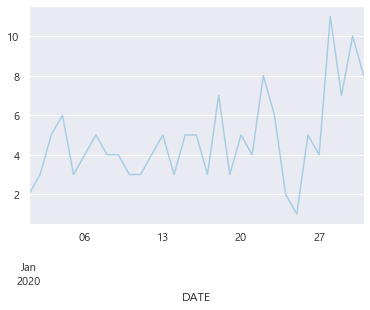

In [87]:
# 1월 CC 행 수(데이터 개수)

df_raw_date_1_C.resample('D')['D_TYPE'].count().plot()

설연휴에 건수가 많이 줄어든거 외엔 크게 의미없어보이는 패턴

            COUNT
DATE             
2020-01-01      7
2020-01-02     13
2020-01-03     11
2020-01-04     33
2020-01-05     16
...           ...
2020-12-27     19
2020-12-28     24
2020-12-29     25
2020-12-30     40
2020-12-31     43

[366 rows x 1 columns]


<Figure size 2160x720 with 0 Axes>

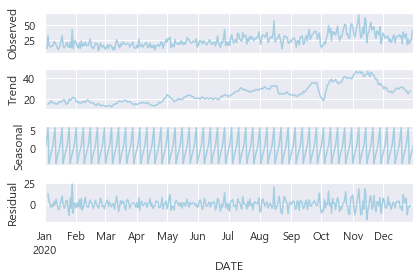

In [88]:
from statsmodels.tsa.seasonal import seasonal_decompose

# CC의 결제건수(count_sum) 시계열
df_raw_date_C = df_raw_date.loc[df_raw_date['D_TYPE']=='CC']
ts = df_raw_date_C.resample('D')['D_TYPE','COUNT'].sum()
print(ts)
result = seasonal_decompose(ts, model='Additive')
plt.figure(figsize=(30,10))
result.plot()
plt.show()

1.원본데이터
2.추세성분
3.계절성분
4.불규칙성분

In [89]:
# D_TYPE이 CC인 데이터 전체기간

df_raw_date_C

,USER_ID,JOIN_DATE,D_TYPE,STORE_ID,GOODS_TYPE,COUNT,AD1,MONTH,YEAR,WeekDay,WeekDay2
DATE,,,,,,,,,,,
2020-01-01,999665,2018-12-16,CC,82399,A,6,JRR,01,2020,2,평일
2020-01-01,1081430,1970-01-01,CC,90070,A,1,GD,01,2020,2,평일
2020-01-02,999665,2018-12-16,CC,104988,A,11,GN,01,2020,3,평일
2020-01-02,1410151,1970-01-01,CC,92437,B,1,J,01,2020,3,평일
2020-01-02,1415023,1970-01-01,CC,131081,A,1,YO,01,2020,3,평일
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-29,1035854,2019-01-14,CC,92505,A,1,J,12,2020,1,평일
2020-12-29,1828010,1970-01-01,CC,220635,C,1,GN,12,2020,1,평일
2020-12-30,999665,2018-12-16,CC,220797,D,40,GS,12,2020,2,평일


In [90]:
# 가입일과 유저아이디 확인

df_raw_date_C_USER = df_raw_date_C.groupby(['JOIN_DATE','USER_ID'])['COUNT'].sum().reset_index()
df_raw_date_C_USER

,JOIN_DATE,USER_ID,COUNT
0,1970-01-01,1026736,2
1,1970-01-01,1060294,1
2,1970-01-01,1071641,6
3,1970-01-01,1075881,1
4,1970-01-01,1081430,13
...,...,...,...
264,2018-12-16,999665,7919
265,2019-01-14,1035854,85
266,2019-11-15,1393529,13
267,2019-11-15,1393530,26


In [91]:
# 결제건수 가장 많은 유저부터 내림차순

df_raw_date_C_USER = df_raw_date_C_USER.sort_values(by='COUNT', ascending=False)
df_raw_date_C_USER.head(20)

,JOIN_DATE,USER_ID,COUNT
264,2018-12-16,999665,7919
265,2019-01-14,1035854,85
237,1970-01-01,654237,68
28,1970-01-01,1355917,53
55,1970-01-01,1477219,50
15,1970-01-01,1251357,44
7,1970-01-01,1163314,39
25,1970-01-01,1318779,36
40,1970-01-01,1415023,33
38,1970-01-01,1410151,32


상위 20 유저중에 1970-01-01 가입자가 많음(테스트용?)   
D_TYPE에서 CC를 제거해야할지 말아야할지 고민

USER_ID 999665는 결제건수가 많아서 이상치로 보임  
헤비유저로 보이므로 기업이 아닐까 생각

In [92]:
# CC 이용? 1위 유저

df_raw_999665 = df_raw.loc[df_raw['USER_ID']=='999665']
df_raw_999665

,USER_ID,JOIN_DATE,D_TYPE,STORE_ID,GOODS_TYPE,DATE,COUNT,AD1,MONTH,YEAR,WeekDay,WeekDay2
372,999665,2018-12-16,CC,82399,A,2020-01-01,6,JRR,01,2020,2,평일
1527,999665,2018-12-16,CC,104988,A,2020-01-02,11,GN,01,2020,3,평일
3121,999665,2018-12-16,CC,181832,A,2020-01-03,7,SC,01,2020,4,평일
5034,999665,2018-12-16,CC,109223,A,2020-01-04,28,MP,01,2020,5,주말
6919,999665,2018-12-16,CC,104916,A,2020-01-05,14,GN,01,2020,6,주말
...,...,...,...,...,...,...,...,...,...,...,...,...
867260,999665,2018-12-16,CC,2428,A,2020-12-27,17,CY,12,2020,6,주말
868847,999665,2018-12-16,CC,109267,A,2020-12-28,24,J,12,2020,0,평일
871562,999665,2018-12-16,CC,90193,C,2020-12-29,23,GW,12,2020,1,평일
874317,999665,2018-12-16,CC,220797,D,2020-12-30,40,GS,12,2020,2,평일


## 가설2.

### 만약, D_TYPE이 결제수단이라면 CC는 적립금인가?
1위 유저 999665는 기업일 것 같음  
공유주차장 사업장 등록하면 결제금의 약 50%의 수익이 적립금으로 지급이 됨   
적립금을 모두주차앱에서 주차비용으로 결제하지 않았을까  

## AA랑 BB도 보자

In [93]:
df_raw_date_A = df_raw_date.loc[df_raw_date['D_TYPE']=='AA']
df_raw_date_B = df_raw_date.loc[df_raw_date['D_TYPE']=='BB']

In [94]:
df_raw_date_A_USER = df_raw_date_A.groupby(['JOIN_DATE','USER_ID'])['COUNT'].sum().reset_index()
df_raw_date_A_USER

,JOIN_DATE,USER_ID,COUNT
0,2013-12-16,224,2
1,2013-12-17,342,1
2,2013-12-17,565,2
3,2013-12-18,729,1
4,2013-12-21,1448,2
...,...,...,...
93472,2020-12-31,1830442,1
93473,2020-12-31,1830468,1
93474,2020-12-31,1830477,1
93475,2020-12-31,1830580,1


In [95]:
df_raw_date_A_USER = df_raw_date_A_USER.sort_values(by='COUNT', ascending=False)
df_raw_date_A_USER.head(20)

,JOIN_DATE,USER_ID,COUNT
57284,2020-03-06,1514190,284
8823,2017-08-31,591610,245
50578,2020-01-11,1467323,239
42414,2019-10-17,1355841,235
43006,2019-10-24,1365069,222
45797,2019-11-27,1407916,222
37836,2019-08-22,1284291,217
30185,2019-04-26,1144500,213
55753,2020-02-23,1504815,208
9491,2017-09-27,612237,201


In [96]:
df_raw_date_B_USER = df_raw_date_B.groupby(['JOIN_DATE','USER_ID'])['COUNT'].sum().reset_index()
df_raw_date_B_USER

,JOIN_DATE,USER_ID,COUNT
0,2013-12-17,232,24
1,2013-12-22,1588,2
2,2013-12-23,1634,3
3,2013-12-23,1644,1
4,2014-01-07,2872,2
...,...,...,...
71674,2020-12-31,1830534,1
71675,2020-12-31,1830544,1
71676,2020-12-31,1830551,1
71677,2020-12-31,1830570,1


In [97]:
df_raw_date_B_USER = df_raw_date_B_USER.sort_values(by='COUNT', ascending=False)
df_raw_date_B_USER.head(20)

,JOIN_DATE,USER_ID,COUNT
28367,2019-07-05,1224426,223
17438,2018-09-06,909315,209
27498,2019-06-17,1201981,207
45286,2020-03-31,1532535,201
8928,2017-10-31,640247,200
36809,2019-12-06,1419336,196
35442,2019-11-15,1392847,195
33185,2019-10-07,1342970,194
11089,2018-01-26,710382,188
6290,2017-06-10,535188,187


AA와 BB도 상위 20개를 뽑아서 보았지만, 이상치로 보이는 결제건수는 없어보임  
또한, 유저들의 가입일도 다양하게 분포되어 있는 것으로 보임  
D_TYPE이 아직 무엇인지 확실하지 않지만, CC는 이상치로 봐야하지 않을까? 싶음

## 윤지님 EDA 본 후,

D_TYPE과 GOODS_TYPE 과의 관계를 의심하고 접근하였지만,  
상관계수가 거의 0이었음. 따라서, 두 변수가 상하관계?는 아닌듯 함  

D_TYPE을 결제수단이라고 생각한다면,  
쿠폰/충전금/적립금  
(+ 더 찾아보니 수익이 적립금으로 지급되고, 사용하기 위해선  
충전금으로 전환하여야 함)  

다르게 D_TYPE을 민영/공영/제휴로 생각도 해봤지만,   
D_TYPE과 스토어ID가 한가지 타입만 결정되지 않음(다대다 매칭-다른팀 참고)  

결론은....